In [3]:
import glob 
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

save_dir = "/home/hanna/MS-figures/"

In [4]:
def get_path(year, month, base = '/home/hanna/lagrings/ERA5_monthly/'):
    month ="%2.2d" %month # includng leading zeros.
    search_str = '{}*{}*tcc.nc'.format(year, month)
    return glob.glob(os.path.join(base, search_str))
    

In [5]:
year = 2012
month = 1


In [6]:
def get_missing_hours(year, month):
    files = get_path(year, month)
    
    if len(files) == 0:
        print("year: {}, month: {}".format(year, month))
        return np.nan
    else:
        fil = files[0]
        if month < 10:
            month1 = "%2.2d" %month
            month2 = "%2.2d" %(month+1)
            year2 = year

        elif month == 12:
            year2 = year+1
            month1 = month 
            month2="01"
        else:
            month1 = month
            month2 = month + 1
            year2  = year 
            
        data = xr.open_dataset(fil)
        #print(data)
        start = '{}-{}-01'.format(year, month1)
        stop = '{}-{}-01'.format(year2, month2)
        
        timearray = np.arange(start, stop, np.timedelta64(1,'h'), dtype='datetime64[ns]')
        #print(len(timearray))
        ll = data.time.values.astype(np.datetime64)
        
        counter = 0
        for element in timearray:
            if element not in ll:
                counter += 1
                
        assert len(timearray) >= counter, "how, start {}, stop {}, "\
                    "len timearray {}, counter {}".format(start, stop, len(timearray), counter)
        return counter 

In [7]:
years = np.arange(2004, 2019)
months = np.arange(1, 13)
storage = {}
for y in years:
    storage[str(y)] = {}
    for m in months:      
        storage[str(y)][str(m)] = get_missing_hours(y, m)



year: 2004, month: 1
year: 2004, month: 2
year: 2004, month: 3
year: 2009, month: 5
year: 2017, month: 11


In [8]:
import pandas as pd
df = pd.DataFrame.from_dict(storage)

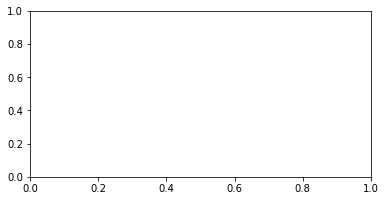

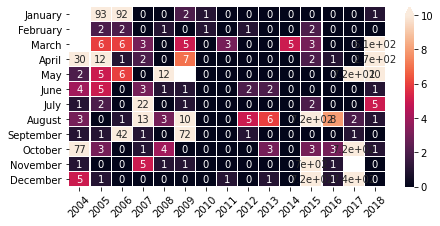

In [44]:
from sclouds.plot.helpers import TEXT_WIDTH_IN, path_python_figures
fig, ax = plt.subplots(1, 1, figsize = (TEXT_WIDTH_IN, 0.5*TEXT_WIDTH_IN))
ytikz = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax = plt.subplots(1, 1, figsize = (TEXT_WIDTH_IN, 0.5*TEXT_WIDTH_IN))
ax2 = sns.heatmap(df, linewidths=0.1, linecolor='white', vmax = 10,annot=True, # fmt="d",
            cbar_kws={'extend':'max'}, ax = ax, yticklabels=ytikz)

plt.subplots_adjust(hspace = 0.2, top=0.97, bottom=0.15, left = 0.15, right = 1.05)
plt.xticks(rotation=45) 
fig.savefig(path_python_figures + 'heatmap_missing_values.pdf')